In [42]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import talib as ta
import numpy as np 
from talib import abstract
import pandas_datareader.data as web
from pandas_datareader import data,wb
import yfinance as yf
import mplfinance as fplt
import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import plotly.graph_objects as go
import plotly.express as px
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request
import requests
import config

Index update

In [4]:
index = '^GSPC'
sp500 = yf.download(tickers=index,period='y',interval='15m')
df2 = pd.DataFrame(sp500)
sp500 = df2.to_csv('sp500.csv')
sp500 = pd.read_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed


In [6]:
sp = pd.DataFrame()

sp=yf.download(index,period='y',interval='15m')['Adj Close']

[*********************100%***********************]  1 of 1 completed


Separate; with user input for ticker below.

Stock(s) Data

In [17]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-05-01',end='2023-05-02',interval='1m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  jpm


[*********************100%***********************]  1 of 1 completed


In [189]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05 09:30:00-04:00,126.800003,127.150002,126.459999,126.989998,126.989998,452519
1,2023-04-05 09:35:00-04:00,127.019997,127.320000,126.879997,127.055000,127.055000,162762
2,2023-04-05 09:40:00-04:00,127.050003,127.379997,126.900002,127.110001,127.110001,184924
3,2023-04-05 09:45:00-04:00,127.120003,127.690002,127.040001,127.540001,127.540001,136462
4,2023-04-05 09:50:00-04:00,127.540001,128.149994,127.480003,128.009995,128.009995,215854


In [191]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1356,2023-05-01 12:00:00-04:00,141.910004,142.380005,141.889999,142.380005,142.380005,154377
1357,2023-05-01 12:05:00-04:00,142.380005,142.539993,142.339996,142.509903,142.509903,158613
1358,2023-05-01 12:10:00-04:00,142.514999,142.539993,142.350006,142.470001,142.470001,110833
1359,2023-05-01 12:15:00-04:00,142.460007,142.720001,142.449997,142.539993,142.539993,131953
1360,2023-05-01 12:20:00-04:00,142.544998,142.690002,142.544998,142.679993,142.679993,40002


In [92]:
# df.rest_index() vs df.index()
data = df.index()

TypeError: 'RangeIndex' object is not callable

In [30]:
# renaming Datetime 
data.rename(columns={'Datetime':'time'})

,time,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01 09:30:00,142.020004,142.839905,141.300003,141.848907,141.848907,3476710
1,2023-05-01 09:45:00,141.850006,142.279999,141.479996,141.729996,141.729996,1058696
2,2023-05-01 10:00:00,141.720001,142.039993,141.100006,141.880005,141.880005,1340501
3,2023-05-01 10:15:00,141.869995,142.469894,141.693695,142.240005,142.240005,1040637
4,2023-05-01 10:30:00,142.250000,143.130005,142.179993,143.119995,143.119995,1200841
5,2023-05-01 10:45:00,143.110001,143.360001,142.389694,142.414993,142.414993,863346
6,2023-05-01 11:00:00,142.399994,142.565002,142.339996,142.449997,142.449997,64739


Adding in moving average; googled the best EMA for 15 min chart since that is what I am using.

In [18]:
def print_data_chart():
    data['20EMA']=ta.EMA(data['Close'],20)
    data['5EMA']=ta.EMA(data['Close'],5)
    chart_data = go.Candestick(x=data['time'],open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'])
    fig = go.Figure(data=[chart_data])
    ema_trace = go.scatter(x=data['time'],y=data['20EMA'],mode='lines',name='20EMA')
    fig.add_trace(ema_trace)
    fig.show()

In [37]:
print_data_chart()

AttributeError: module 'plotly.graph_objects' has no attribute 'Candestick'

# Dash Work

In [13]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-05-01',end='2023-05-02',interval='1m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  gme


[*********************100%***********************]  1 of 1 completed


In [14]:
data = pd.read_csv('portfolio.csv',index_col=0,parse_dates=True)
data.index.name='Datetime'

In [15]:
data['20EMA']=ta.EMA(data['Close'],20)
data['5EMA']=ta.EMA(data['Close'],5)
ema_lines = data[['5EMA','20EMA']]

In [16]:
# RSI
data['RSI'] = ta.RSI(data['Close'],14)
RSI_col = data['RSI']
RSI = fplt.make_addplot(RSI_col)

In [17]:
# Support and Resistance
pivot_point = (data['High'] + data['Low'] + data['Close']) / 3

data['support_l1'] = (pivot_point *2) - data['High']
data['support_l2'] = pivot_point - (data['High'] - data['Low'])
data['resistance_l1'] = (pivot_point * 2) - data['Low'] 
data['resistance_l2'] = pivot_point + (data['High'] - data['Low'])

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI,support_l1,support_l2,resistance_l1,resistance_l2
Datetime,,,,,,,,,,,,,
2023-05-01 09:30:00-04:00,19.1600,19.200001,19.080000,19.0924,19.0924,49004,NaN,NaN,NaN,19.048266,19.004133,19.168267,19.244134
2023-05-01 09:31:00-04:00,19.0700,19.190001,19.070000,19.1800,19.1800,8261,NaN,NaN,NaN,19.103333,19.026666,19.223334,19.266668
2023-05-01 09:32:00-04:00,19.1600,19.190001,19.120001,19.1800,19.1800,3255,NaN,NaN,NaN,19.136667,19.093334,19.206667,19.233334
2023-05-01 09:33:00-04:00,19.1600,19.170000,19.139999,19.1600,19.1600,6225,NaN,NaN,NaN,19.143333,19.126666,19.173333,19.186667
2023-05-01 09:34:00-04:00,19.1423,19.200001,19.142300,19.1600,19.1600,3659,NaN,19.15448,NaN,19.134866,19.109732,19.192567,19.225135


In [19]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI,support_l1,support_l2,resistance_l1,resistance_l2
Datetime,,,,,,,,,,,,,
2023-05-01 15:55:00-04:00,18.534901,18.549999,18.51,18.514999,18.514999,13967,18.592758,18.525134,29.549282,18.500000,18.485001,18.539999,18.564999
2023-05-01 15:56:00-04:00,18.510000,18.530001,18.50,18.520000,18.520000,20719,18.585829,18.523423,30.927244,18.503333,18.486666,18.533334,18.546668
2023-05-01 15:57:00-04:00,18.520000,18.540001,18.52,18.525000,18.525000,16216,18.580036,18.523949,32.351631,18.516666,18.508333,18.536667,18.548334
2023-05-01 15:58:00-04:00,18.530001,18.530001,18.50,18.500000,18.500000,21613,18.572413,18.515966,29.117911,18.490000,18.480000,18.520000,18.540001
2023-05-01 15:59:00-04:00,18.500000,18.559999,18.49,18.559999,18.559999,56440,18.571231,18.530644,43.670515,18.513333,18.466667,18.583333,18.606666


In [20]:
s1 = data['support_l1']
s2 = data['support_l2']
r1 = data['resistance_l1']
r2 = data['resistance_l2']

In [21]:
techs = [fplt.make_addplot(ema_lines, linestyle='dashdot'),
        fplt.make_addplot(RSI_col,panel=1,color='g',linestyle='dotted'),
        fplt.make_addplot(s1,color='red',linewidths=0),
        fplt.make_addplot(s2,color='tomato',linewidths=.1),
        fplt.make_addplot(r1,color='limegreen',linewidths=.1),
        fplt.make_addplot(r2,color='lawngreen',linewidths=.1)
]

Text(1.05, 0.76, ' 2023/05/01\nO: 18.50\nH: 18.56\nL: 18.49\nC: 18.56\nV: 56440\n')

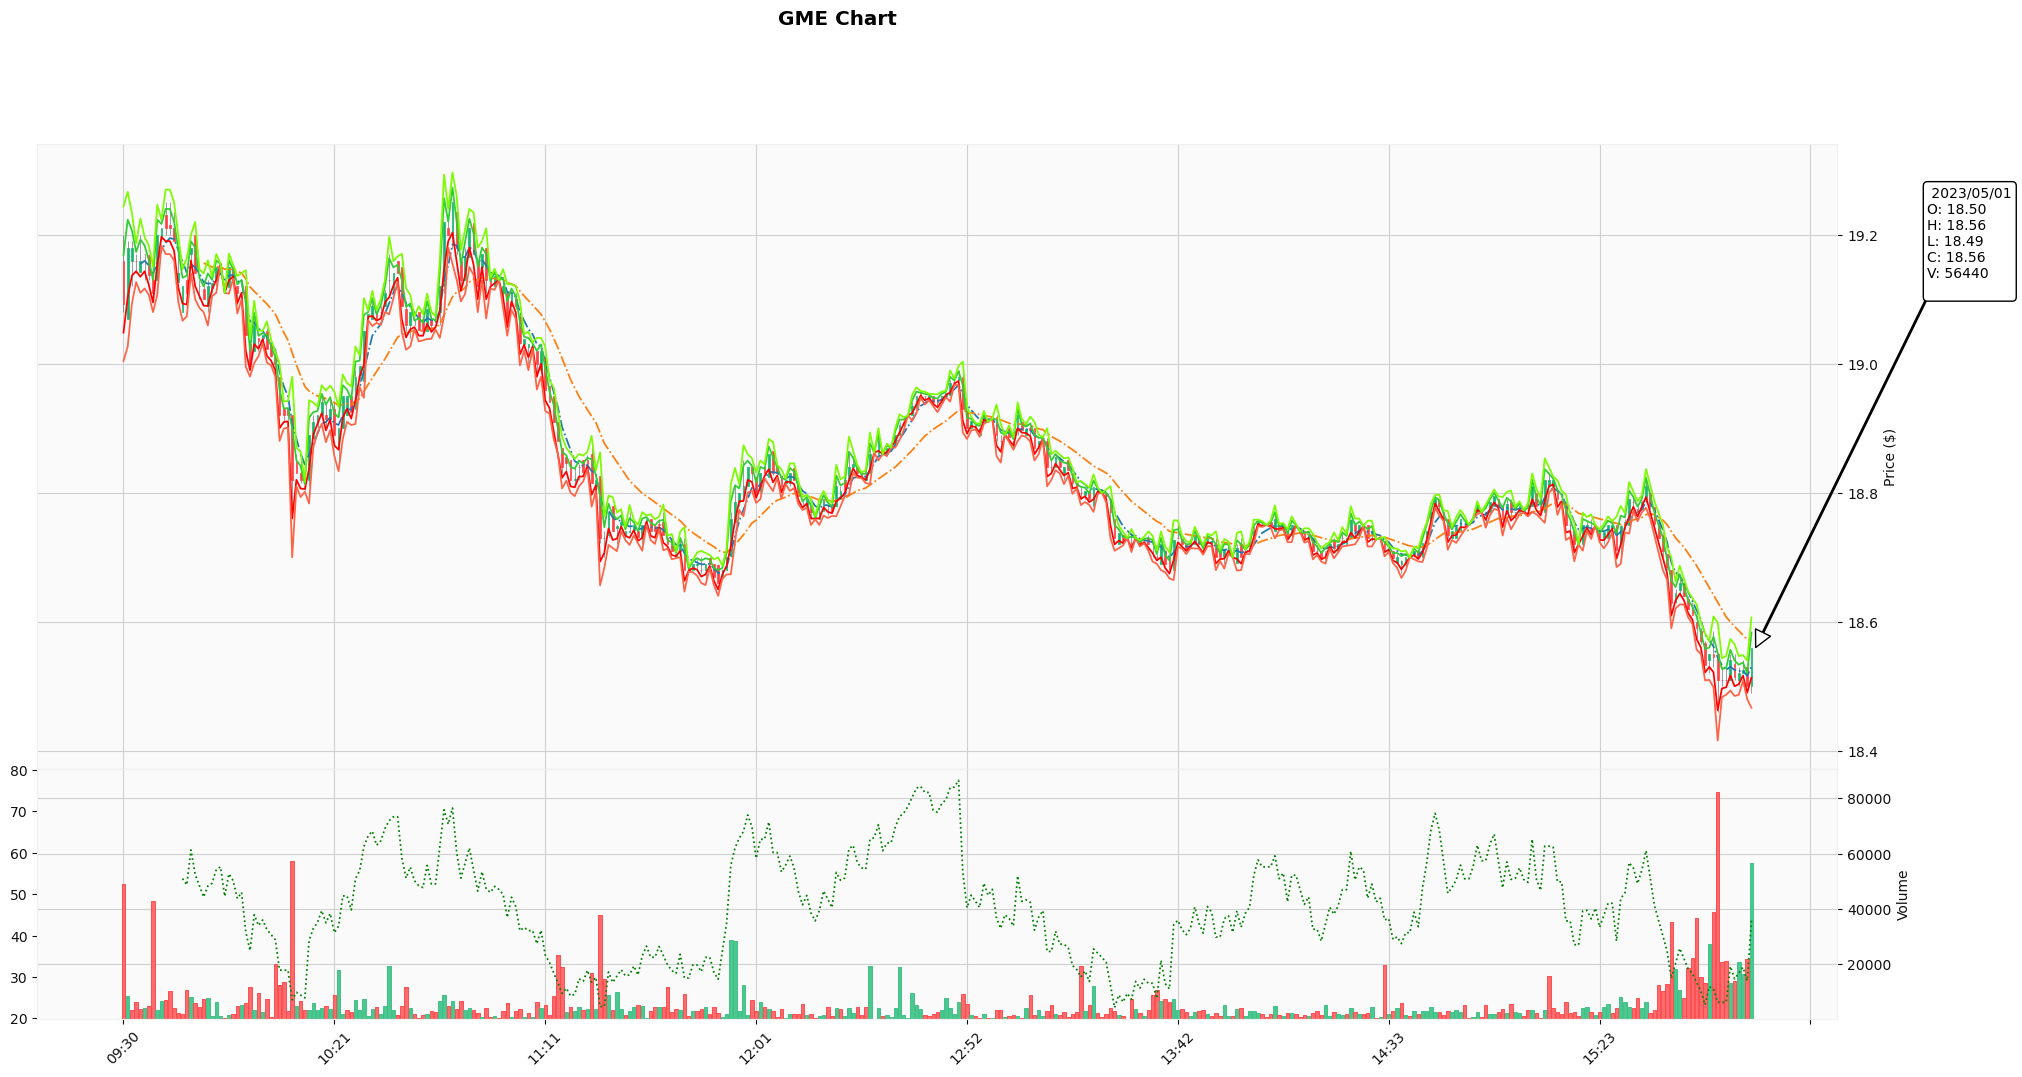

In [22]:
fig, axlist = fplt.plot(
    data,
    type='candle',
    title=f'{stock} Chart',
    ylabel='Price ($)',
    volume=True,
    style='yahoo',
    addplot=techs,
    figsize=(25,12.5),
    returnfig=True
)

last = data.iloc[-1,:]
text = (f" {last.name.date().strftime('%Y/%m/%d'):}\n"+
        f"O: {last['Open']:.2f}\n"+
        f"H: {last['High']:.2f}\n"+
        f"L: {last['Low']:.2f}\n"+
        f"C: {last['Close']:.2f}\n"+
        f"V: {last['Volume']:.0f}\n"
       )


axlist[0].annotate(text, xy=(len(df),last['Close']), textcoords='axes fraction', xytext=(1.05,0.76),
                   arrowprops=dict(facecolor='white',width=1),bbox=dict(boxstyle="round",fc="white"))

In [278]:
url = 'https://financialmodelingprep.com/api/v3/income-statement/JPM?limit=120&apikey=37aaac8c2789b881f4282cab85bba4cf'

from urllib.request import urlopen
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [23]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

#pass ticker of the company

stock

api = config.api

# Request Financial Data from API and load to variables

IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{stock}?limit=40&apikey={api}').json()

key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{stock}?limit=40&apikey={api}').json()

profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{stock}?apikey={api}').json()

millions = 1000#000

#Create empty dictionary and add the financials to it

financials = {}

# dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#for item in range(0,17):

dates = [2023,2022,2021,2020,2019]
for item in range(5):
    
    financials[dates[item]] ={}

    #Key Metrics
    financials[dates[item]]['Mkt Cap'] = key_Metrics[item]['marketCap'] 
    financials[dates[item]]['Debt to Equity'] = key_Metrics[item]['debtToEquity']
    financials[dates[item]]['Debt to Assets'] = key_Metrics[item]['debtToAssets']
    financials[dates[item]]['Revenue per Share'] = key_Metrics[item]['revenuePerShare']
    financials[dates[item]]['NI per Share'] = key_Metrics[item]['netIncomePerShare']
# Income Statement
    financials[dates[item]]['Revenue'] = IS[item]['revenue'] / millions
    financials[dates[item]]['Gross Profit'] = IS[item]['grossProfit'] / millions
    financials[dates[item]]['R&D Expenses'] = IS[item]['researchAndDevelopmentExpenses']/ millions
    financials[dates[item]]['Op Expenses'] = IS[item]['operatingExpenses'] / millions
    financials[dates[item]]['Op Income'] = IS[item]['operatingIncome'] / millions
    financials[dates[item]]['Net Income'] = IS[item]['netIncome'] / millions
# Balance Sheet
    financials[dates[item]]['Cash'] = BS[item]['cashAndCashEquivalents'] / millions
    financials[dates[item]]['Inventory'] = BS[item]['inventory'] / millions
    financials[dates[item]]['Cur Assets'] = BS[item]['totalCurrentAssets'] / millions
    financials[dates[item]]['LT Assets'] = BS[item]['totalNonCurrentAssets'] / millions
    financials[dates[item]]['Int Assets'] = BS[item]['intangibleAssets'] / millions
    financials[dates[item]]['Total Assets'] = BS[item]['totalAssets'] / millions
    financials[dates[item]]['Cur Liab'] = BS[item]['totalCurrentLiabilities'] / millions
    financials[dates[item]]['LT Debt'] = BS[item]['longTermDebt'] / millions
    financials[dates[item]]['LT Liab'] = BS[item]['totalNonCurrentLiabilities'] / millions
    financials[dates[item]]['Total Liab'] = BS[item]['totalLiabilities'] / millions
    financials[dates[item]]['SH Equity'] = BS[item]['totalStockholdersEquity'] / millions
# Cash Flow Statement
    financials[dates[item]]['CF Operations'] = CF[item]['netCashProvidedByOperatingActivities'] / millions
    financials[dates[item]]['CF Investing'] = CF[item]['netCashUsedForInvestingActivites'] / millions
    financials[dates[item]]['CF Financing'] = CF[item]['netCashUsedProvidedByFinancingActivities'] / millions
    financials[dates[item]]['CAPEX'] = CF[item]['capitalExpenditure'] / millions
    financials[dates[item]]['FCF'] = CF[item]['freeCashFlow'] / millions
    financials[dates[item]]['Dividends Paid'] = CF[item]['dividendsPaid'] / millions

    #Income Statement Ratios
    financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
    financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
    financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
    financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']

    #BS Ratios
    financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
    financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
    financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
    financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']

    #Return Ratios

    financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
    financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
    financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']

    #Price Ratios

    financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
    financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
    financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
    financials[dates[item]]['Price To FCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
    financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
    financials[dates[item]]['EPS'] = IS[item]['eps']
    financials[dates[item]]['EPS'] = IS[item]['eps']

#Transform the dictionary into a Pandas
fundamentals = pd.DataFrame.from_dict(financials,orient='columns')

 #Calculate Growth measures
fundamentals['CAGR'] = ((fundamentals[2022]/fundamentals[2021])**(1/4) - 1)
fundamentals['2023 growth'] = (fundamentals[2023] - fundamentals[2022] )/ fundamentals[2022]
fundamentals['2022 growth'] = (fundamentals[2022] - fundamentals[2021] )/ fundamentals[2021]
fundamentals['2021 growth'] = (fundamentals[2021] - fundamentals[2020] )/ fundamentals[2020]
fundamentals['2020 growth'] = (fundamentals[2020] - fundamentals[2019] )/ fundamentals[2019]

# Export to CSV
fundamentals.to_csv('fundamentals.csv')

print(fundamentals)

                               2023         2022          2021         2020  \
Mkt Cap                6,941,844.00 7,108,266.00 21,125,000.00   336,000.00   
Debt to Equity                 1.35         1.18          4.66         3.61   
Debt to Assets                 0.58         0.54          0.82         0.78   
Revenue per Share             19.48        20.70         19.58        18.47   
NI per Share                  -1.03        -1.31         -0.83        -1.33   
Revenue                2,226,400.00 1,186,400.00  1,136,000.00 1,378,400.00   
Gross Profit             499,800.00   291,600.00    282,200.00   298,500.00   
R&D Expenses                   0.00         0.00          0.00         0.00   
Op Expenses              453,400.00   387,900.00    387,500.00   452,200.00   
Op Income                 46,200.00   -96,300.00   -105,300.00  -153,700.00   
Net Income                48,200.00   -94,700.00   -108,700.00  -157,900.00   
Cash                   1,139,000.00   803,800.00    

In [24]:
df = pd.read_csv('fundamentals.csv',index_col=0)

In [25]:
df.head(20)

,2023,2022,2021,2020,2019,CAGR,2023 growth,2022 growth,2021 growth,2020 growth
Mkt Cap,"6,941,844.00","7,108,266.00","21,125,000.00","336,000.00","1,147,604.00",-0.24,-0.02,-0.66,61.87,-0.71
Debt to Equity,1.35,1.18,4.66,3.61,2.03,-0.29,0.14,-0.75,0.29,0.78
Debt to Assets,0.58,0.54,0.82,0.78,0.67,-0.10,0.06,-0.34,0.05,0.17
Revenue per Share,19.48,20.70,19.58,18.47,20.29,0.01,-0.06,0.06,0.06,-0.09
NI per Share,-1.03,-1.31,-0.83,-1.33,-1.65,0.12,-0.22,0.59,-0.38,-0.19
Revenue,"2,226,400.00","1,186,400.00","1,136,000.00","1,378,400.00","2,253,900.00",0.01,0.88,0.04,-0.18,-0.39
Gross Profit,"499,800.00","291,600.00","282,200.00","298,500.00","378,200.00",0.01,0.71,0.03,-0.05,-0.21
R&D Expenses,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
Op Expenses,"453,400.00","387,900.00","387,500.00","452,200.00","538,900.00",0.00,0.17,0.00,-0.14,-0.16
Op Income,"46,200.00","-96,300.00","-105,300.00","-153,700.00","-160,700.00",-0.02,-1.48,-0.09,-0.31,-0.04


In [28]:
import json
from urllib.request import urlopen

# api_pull = input('What do you want to pull from the API? ')
# url = 'https://financialmodelingprep.com' + api_pull + '&apikey=37aaac8c2789b881f4282cab85bba4cf'
url = f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}'
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    r = requests.get(url)
    r = r.json()
    return r
    r = r['real_time']
    r = pd.DataFrame.from_dict(r)
    r = r.T
    r.columns = r.iloc[0]


In [40]:
# API Request
response = requests.get(f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}')
real_time_data = response.json()

# Use json_normalize to convert JSON data to a df
real_time_df = pd.json_normalize(real_time_data)
print(real_time_df.head())

  symbol  price  volume
0    GME  18.22  598803


In [362]:
real_time_price = requests.get(f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}')
gen_fin_news = requests.get(f'https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page=0&apikey={api}')
stock_news = requests.get(f'https://financialmodelingprep.com/api/v3/stock_news?tickers={stock}&limit=50&apikey={api}')
#price target consensus
target_price_consensus = requests.get(f'https://financialmodelingprep.com/api/v4/price-target-consensus?symbol={stock}&apikey={api}')
#price target summary
price_target_summary = requests.get(f'https://financialmodelingprep.com/api/v4/price-target-summary?symbol={stock}&apikey={api}')
# target upgrades and downgrades
target_up_down = requests.get(f'https://financialmodelingprep.com/api/v4/upgrades-downgrades?symbol={stock}&apikey={api}')
# earnings
earnings = requests.get(f'https://financialmodelingprep.com/api/v3/historical/earning_calendar/{stock}?limit=80&apikey={api}')
# historical dividends
div_hist = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{stock}?apikey={api}')
# economic calender
econ_calendar = requests.get(f'https://financialmodelingprep.com/api/v3/economic_calendar?from=2023-01-01&to=2023-12-31&apikey={api}')
# company outlook USE INSTEAD OF PROFILE
company_outlook = requests.get(f'https://financialmodelingprep.com/api/v4/company-outlook?symbol={stock}&apikey={api}')
# stock grade
stock_grade = requests.get(f'https://financialmodelingprep.com/api/v3/grade/{stock}?limit=500&apikey={api}')
# quarterly analyst estimates
analyst_est = requests.get(f'https://financialmodelingprep.com/api/v3/analyst-estimates/{stock}?period=quarter&limit=30&apikey={api}')
# treasury rates
bond_rates = requests.get(f'https://financialmodelingprep.com/api/v4/treasury?from=2023-03-1&to=2023-05-10&apikey={api}')
# fed funds
fed_funds = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=federalFunds&from=2019-01-01&to=2023-05-10&apikey={api}')
# cpi
cpi = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=CPI&from=2019-10-10&to=2023-05-10&apikey={api}')
# real GDP
real_gdp = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=realGDP&from=2019-10-10&to=2023-05-10&apikey={api}')
# consumer sentiment
consumer_senti = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=consumerSentiment&from=2019-10-10&to=2023-05-10&apikey={api}')
# durableGoods
dur_goods = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=durableGoods&from=2019-10-10&to=2023-05-10&apikey={api}')
# smoothedUSRecessionProbabilities 
recession_prob = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=smoothedUSRecessionProbabilities &from=2019-10-10&to=2023-05-10&apikey={api}')
# 15YearFixedRateMortgageAverage
fifteen_fmort = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=15YearFixedRateMortgageAverage&from=2019-10-10&to=2023-05-10&apikey={api}')
# 30YearFixedRateMortgageAverage
thirty_fmort = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=30YearFixedRateMortgageAverage&from=2019-10-10&to=2023-05-10&apikey={api}')
# unemploymentRate
unem_rate = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=unemploymentRate&from=2019-10-10&to=2023-05-10&apikey={api}')
# retailSales
ret_sales = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=retailSales&from=2019-10-10&to=2023-05-10&apikey={api}')

In [261]:
df23 = df['2023']

In [262]:
df22 = df['2022']

In [263]:
df21 = df['2021']

In [264]:
df20 = df['2020']

In [326]:
print(mkt_cap)

2023          397,713.78
2022          478,454.53
2021          391,680.57
2020          449,077.10
2019          331,556.57
CAGR               -0.02
2023 growth        -0.17
2022 growth         0.22
2021 growth        -0.13
2020 growth         0.35
Name: Mkt Cap, dtype: float64


In [361]:
cash = df.loc['Cash']
cur_assets = df.loc['Cur Assets']
lt_assets = df.loc['LT Assets']
int_assets = df.loc['Int Assets']
total_assets = df.loc['Total Assets']
mkt_cap = df.loc['Mkt Cap']
de = df.loc['Debt to Equity']
da = df.loc['Debt to Assets']
rps = df.loc['Revenue per Share']
rev = df.loc['Revenue']
gp = df.loc['Gross Profit']
op_inc = df.loc['Op Income']
ni = df.loc['Net Income']
cur_lia = df.loc['Cur Liab']
lt_debt = df.loc['LT Debt']
lt_lia = df.loc['LT Liab']
tot_lia = df.loc['Total Liab']
sh_eq = df.loc['SH Equity']
cf_ops = df.loc['CF Operations']
cf_inv = df.loc['CF Investing']
cf_fin = df.loc['CF Financing']
fcf = df.loc['FCF']
div_paid = df.loc['Dividends Paid']
op_margin = df.loc['Op Margin']
int_cov = df.loc['Int Coverage']
npm = df.loc['Net Profit Margin']
div_yld = df.loc['Dividend Yield']
#Ratios
cur_ratio = df.loc['Current Ratio']
roa = df.loc['ROA']
roe = df.loc['ROE']
roce = df.loc['ROCE']
pe = df.loc['PE']
ps = df.loc['PS']
pb = df.loc['PS']
price_to_fcf = df.loc['Price To FCF']
peg = df.loc['PEG']
eps = df.loc['EPS']

In [ ]:
main_summary = 

In [43]:
from finance_library import myfunctions

ImportError: cannot import name 'myfunctions' from 'finance_library' (unknown location)